## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/data_Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [6]:
# Combine the data into a single dataset
merge_data=pd.merge(study_results,mouse_metadata, on='Mouse ID',how='left')

In [7]:
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the DataFrame.
mice_numbers=len(merge_data['Mouse ID'].unique())
mice_numbers

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse=merge_data[['Mouse ID','Timepoint']].duplicated()
duplicated_mouse

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [10]:
repeated_mouse=merge_data.loc[duplicated_mouse,'Mouse ID'].unique()
repeated_mouse

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data=merge_data.drop_duplicates(['Mouse ID','Timepoint'])

In [13]:
clean_data=merge_data[merge_data['Mouse ID'].isin(repeated_mouse)==False]

In [14]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice in the DataFrame.
mice_numbers1=len(clean_data['Mouse ID'].unique())
mice_numbers1

248

In [15]:
repeated_mouse1=clean_data.loc[duplicated_mouse,'Mouse ID'].unique()
repeated_mouse1

array([], dtype=object)

In [16]:
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median=clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance=clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standarddev=clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM=clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statics=pd.DataFrame({'Mean':mean,
                              'Median':median,
                              'Variance':variance,
                              'Standard Deviation':standarddev,
                              'SEM':SEM})
summary_statics.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [19]:

mice_number=clean_data['Drug Regimen'].value_counts()

mice_number

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

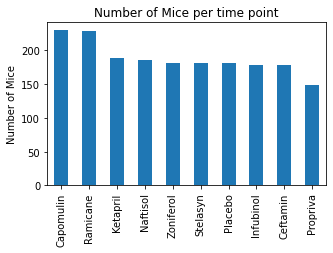

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_number.plot(kind='bar',figsize=(5,3),title='Number of Mice per time point',ylabel="Number of Mice")
plt.show()

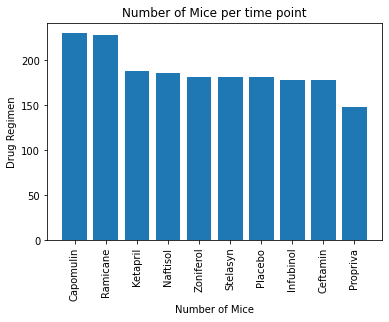

In [21]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#x_axis=(np.arange(len(mice_number)))

plt.bar(mice_number.index.values,mice_number.values)
plt.xticks(rotation='vertical')
plt.title('Number of Mice per time point')
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.show()





## Pie Plots

In [22]:

mice_gender=clean_data['Sex'].value_counts()

mice_gender

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'distribution of female versus male mice'}, ylabel='Sex'>

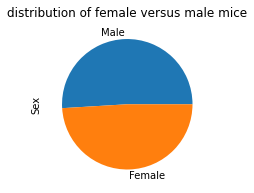

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender.plot(kind='pie',figsize=(5,3),title='distribution of female versus male mice')


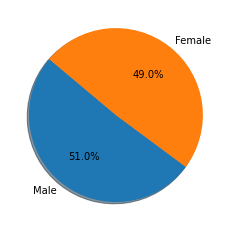

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=['Male','Female']
sizes=mice_gender

plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_tumor=clean_data.groupby(['Mouse ID']).max()['Timepoint']
max_tumor=max_tumor.reset_index()


data_tumor=max_tumor.merge(clean_data,on=['Mouse ID','Timepoint'],how='left')
data_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [28]:
tumor_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_volume_list=[]
quartiles_list=[]
lowerq_list=[]
upperq_list=[]
iqr_list=[]
lower_bound_list=[]
upper_bound_list=[]


for drug in tumor_list:
    final_tumor=data_tumor.loc[data_tumor['Drug Regimen']==drug,'Tumor Volume (mm3)']
    quartiles=final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_volume_list.append(final_tumor)
    quartiles_list.append(quartiles)
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    


In [29]:
summary_df = pd.DataFrame({"Drug": tumor_list,
                              "Lower Bound":lower_bound_list,
                              "Upper Bound": upper_bound_list})
summary_df

,Drug,Lower Bound,Upper Bound
0,Capomulin,20.704562,51.832015
1,Ramicane,17.912664,54.306811
2,Infubinol,36.832905,82.741446
3,Ceftamin,25.355450,87.666458


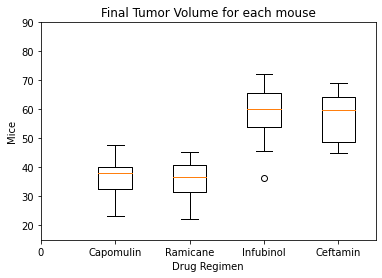

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_volume_list)
plt.xticks(np.arange(5),[0,'Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.title('Final Tumor Volume for each mouse')
plt.ylabel('Mice')
plt.xlabel('Drug Regimen')
plt.ylim(15,90)
plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseb128=clean_data.loc[clean_data['Mouse ID']=='b128']

mouseb128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


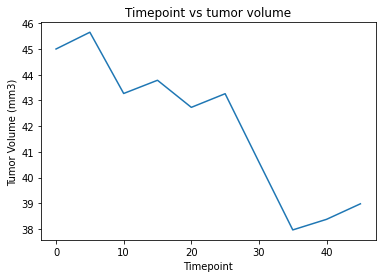

In [32]:


x_axis=mouseb128['Timepoint']
ytumvol=mouseb128['Tumor Volume (mm3)']

plt.plot(x_axis,ytumvol)
plt.title('Timepoint vs tumor volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumorvolumesp=clean_data.loc[clean_data['Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
mouseweightsp=clean_data.loc[clean_data['Drug Regimen']=='Capomulin','Weight (g)']

print(tumorvolumesp)

     Mouse ID  Tumor Volume (mm3)  Weight (g)
0        b128           45.000000          22
226      j246           45.000000          21
227      r554           45.000000          17
228      s185           45.000000          17
229      b742           45.000000          21
...       ...                 ...         ...
1854     s710           40.728578          23
1859     j119           38.125164          23
1878     i557           47.685963          24
1888     r944           41.581521          25
1889     u364           31.023923          17

[230 rows x 3 columns]


In [65]:
averagevol=tumorvolumesp.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
averagewei=tumorvolumesp.groupby(['Mouse ID']).mean()['Weight (g)']
averagewei

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

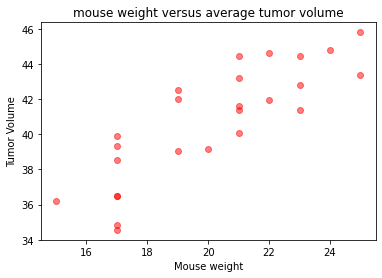

In [68]:
x_axissp=averagewei
data=averagevol

plt.scatter(x_axissp,data,marker='o',facecolors='red',alpha=0.50)

plt.title('mouse weight versus average tumor volume')
plt.xlabel('Mouse weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [70]:
correlation = st.pearsonr(averagewei,averagevol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


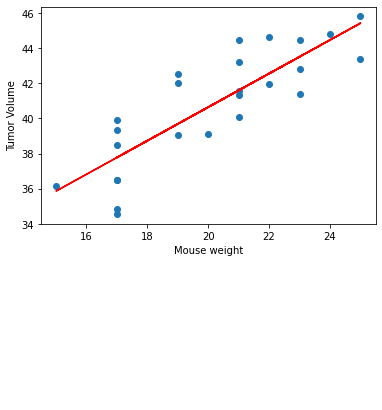

y = 0.95x + 21.55


In [76]:
x_values = averagewei
y_values = averagevol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse weight')
plt.ylabel('Tumor Volume')
plt.show()
print(line_eq)